In [23]:
!pip3 install geopandas contextily

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import numpy as np
from matplotlib.dates import DateFormatter

In [25]:
df = pd.read_parquet('../data/processed/penguin_tracking_processed.parquet')
df['datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')

selected_bird_id = "ADPE28"  
df_filtered = df[df['BirdId'] == selected_bird_id]

geometry = [Point(xy) for xy in zip(df_filtered['Longitude'], df_filtered['Latitude'])]
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry, crs="EPSG:4326")

gdf_projected = gdf.to_crs(epsg=3857)

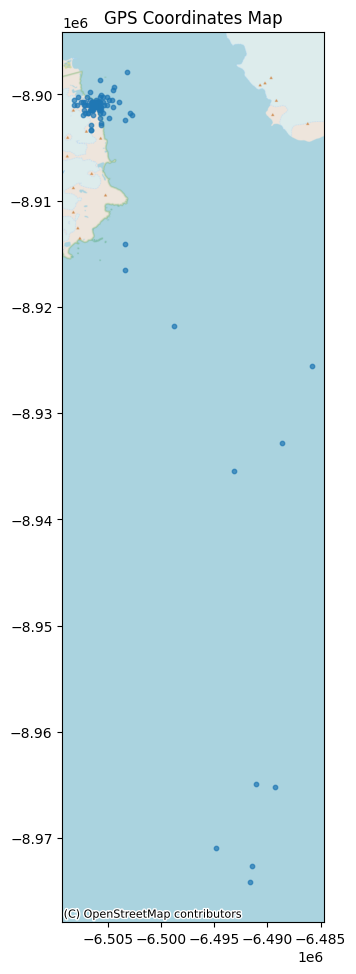

In [26]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_projected.plot(ax=ax, alpha=0.7, markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('GPS Coordinates Map')
plt.tight_layout()
plt.savefig('gps_map.png', dpi=300)
plt.show()

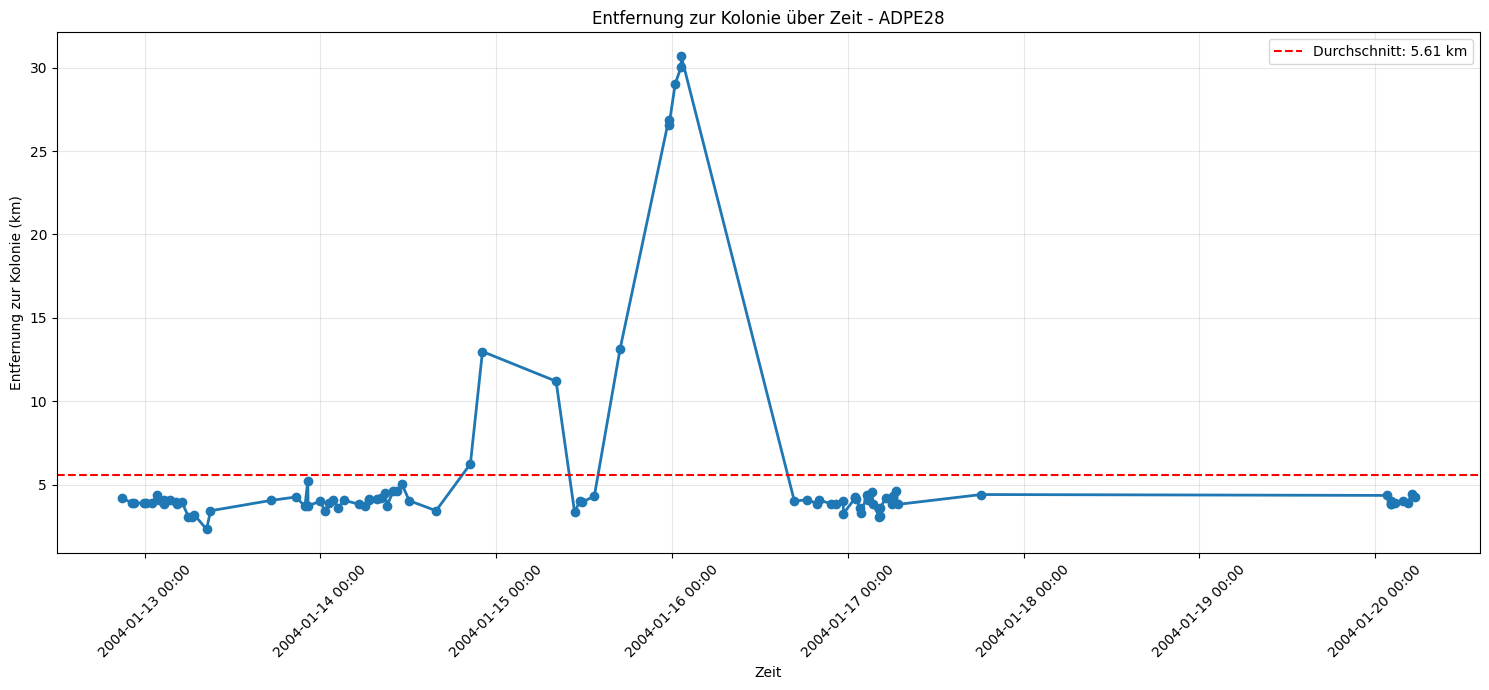

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))
gdf_sorted = gdf.sort_values('datetime')

ax.plot(gdf_sorted['datetime'], gdf_sorted['distance_to_colony_km'], 'o-', linewidth=2, markersize=6)

avg_distance = gdf['distance_to_colony_km'].mean()
ax.axhline(y=avg_distance, color='r', linestyle='--', label=f'Durchschnitt: {avg_distance:.2f} km')

ax.set_xlabel('Zeit')
ax.set_ylabel('Entfernung zur Kolonie (km)')
ax.set_title(f'Entfernung zur Kolonie über Zeit - {selected_bird_id}')
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
ax.legend()

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distance_to_colony_{selected_bird_id}.png', dpi=300)
plt.show()

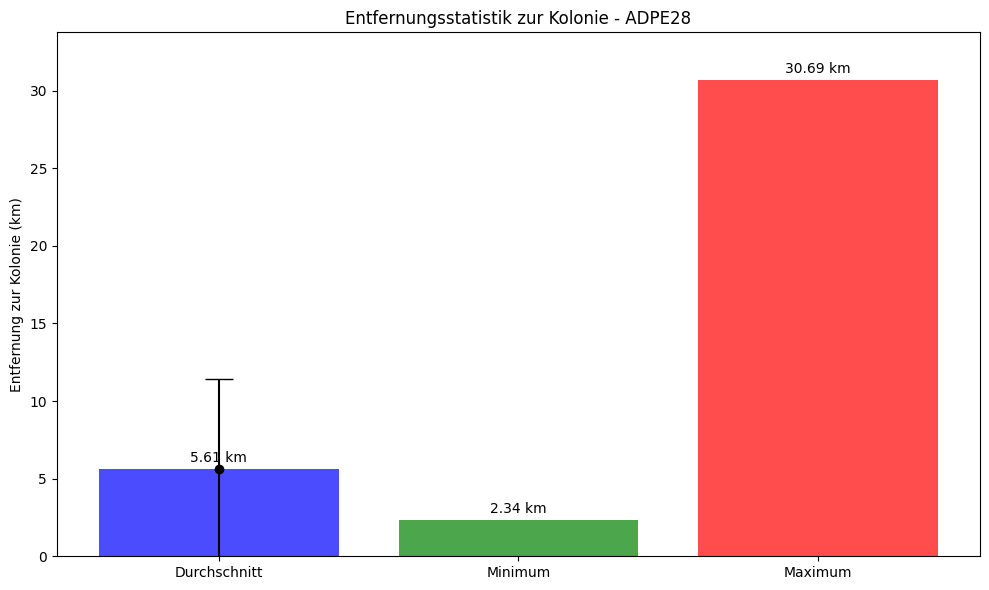

In [32]:
avg_distance = gdf['distance_to_colony_km'].mean()
std_distance = gdf['distance_to_colony_km'].std()
min_distance = gdf['distance_to_colony_km'].min()
max_distance = gdf['distance_to_colony_km'].max()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(['Durchschnitt', 'Minimum', 'Maximum'], 
             [avg_distance, min_distance, max_distance],
             color=['blue', 'green', 'red'],
             alpha=0.7)

ax.errorbar(0, avg_distance, yerr=std_distance, fmt='ko', capsize=10)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f} km',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Entfernung zur Kolonie (km)')
ax.set_title(f'Entfernungsstatistik zur Kolonie - {selected_bird_id}')
ax.set_ylim(0, max_distance * 1.1)
plt.tight_layout()
plt.savefig(f'distance_stats_{selected_bird_id}.png', dpi=300)
plt.show()